In [2]:
import file_locations
import innvestigate
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import vgg16
from keras.models import load_model
from keras.preprocessing import image as image_utils
from keras import Model

Using TensorFlow backend.


In [3]:
model = load_model(file_locations.PATH_TO_CHECKPOINTS+'weights.2019.11.15-1130-streamline.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
#remove softmax
out = model.layers[-2].output
model_nsm = Model(model.inputs, out)

## Relevance Analysis

In [5]:
# define model analyser
analyzer = innvestigate.create_analyzer("deep_taylor", model_nsm)

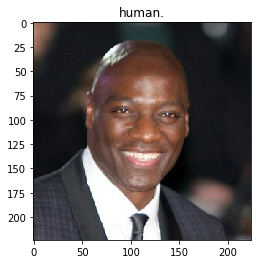

In [69]:
# grab image from database
image = image_utils.load_img(file_locations.PATH_TO_IMDB_GENDER+'0/2452600_1967-08-22_2013.jpg', target_size=(224,224))
plt.imshow(image)
plt.title("human.")
x = image_utils.img_to_array(image)
x = np.expand_dims(x,0)
x = vgg16.preprocess_input(x)

In [70]:
a = analyzer.analyze(x)

In [82]:
from matplotlib.colors import LinearSegmentedColormap
blueblackred_colors = np.array(
  [
      [0.8, 1, 1],  # cyan-white
      [0, 1, 1],  # cyan
      [0, 0, 1],  # blue
      [0, 0, 0],  # black
      [1, 0, 0],  # red
      [1, 1, 0],  # yellow
      [1, 1, 0.8],  # yellow-white
  ]
)
blueblackred = LinearSegmentedColormap.from_list("blueblackred", blueblackred_colors)

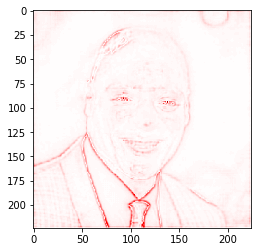

In [84]:
r = a[0].sum(axis=2)
r /= np.max(np.abs(r))
plt.imshow(r, cmap='seismic', clim=[-1,1]);

1.0

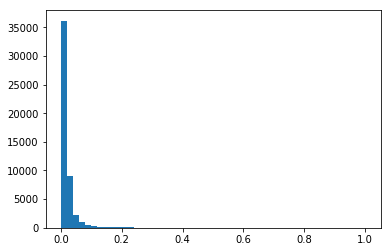

In [76]:
plt.hist(r.ravel(),bins=50);
np.max(r)

## Batch Processing

In [43]:
#grab some files
import random, os, time
filenames = random.sample(os.listdir(file_locations.PATH_TO_IMDB_GENDER+'0/'), 20)
filenames = [file_locations.PATH_TO_IMDB_GENDER+'0/'+s for s in filenames]

In [44]:
filenames

['Z:/IMDB_Gender/0/8855146_1987-10-05_2010.jpg',
 'Z:/IMDB_Gender/0/42317433_1952-05-24_1950.jpg',
 'Z:/IMDB_Gender/0/4334396_1972-09-07_1993.jpg',
 'Z:/IMDB_Gender/0/32966579_1988-06-27_2012.jpg',
 'Z:/IMDB_Gender/0/1833064_1977-09-09_2005.jpg',
 'Z:/IMDB_Gender/0/22946135_1986-09-13_2015.jpg',
 'Z:/IMDB_Gender/0/6145411_1982-01-24_2009.jpg',
 'Z:/IMDB_Gender/0/42659768_1994-07-08_2013.jpg',
 'Z:/IMDB_Gender/0/274757_1960-07-31_2000.jpg',
 'Z:/IMDB_Gender/0/36568798_1992-10-11_2012.jpg',
 'Z:/IMDB_Gender/0/2555755_1976-05-11_2008.jpg',
 'Z:/IMDB_Gender/0/23713824_1959-03-15_2014.jpg',
 'Z:/IMDB_Gender/0/11303549_1921-12-16_1996.jpg',
 'Z:/IMDB_Gender/0/38264243_1982-09-14_2013.jpg',
 'Z:/IMDB_Gender/0/34399902_1961-07-25_2010.jpg',
 'Z:/IMDB_Gender/0/1487263_1966-04-22_2009.jpg',
 'Z:/IMDB_Gender/0/7470923_1982-01-29_2010.jpg',
 'Z:/IMDB_Gender/0/39684057_1975-09-01_2013.jpg',
 'Z:/IMDB_Gender/0/24223377_1989-12-31_2009.jpg',
 'Z:/IMDB_Gender/0/1991766_1952-12-10_2010.jpg']

In [45]:
def relevanceMap(f):
    relevance_maps = []
    pics = []
    for i in range(len(f)):
        print("Analysing image",i+1,"of",len(f),"...")
        start = time.time()
        image = image_utils.load_img(f[i], target_size=(224,224))
        x = image_utils.img_to_array(image)
        x = np.expand_dims(x,0)
        x = vgg16.preprocess_input(x)
        a = analyzer.analyze(x)
        r = a[0].sum(axis=2)
        r /= np.max(np.abs(r))
        end = time.time()
        
        print("ETA:",str(time.ctime(int(time.time()+((len(f)-i-1)*(end-start))))))

        relevance_maps.append(r)
        pics.append(image)
    return (relevance_maps, pics)

In [46]:
(rs,ps) = relevanceMap(filenames)

Analysing image 1 of 20 ...
ETA: Fri Nov 22 13:23:02 2019
Analysing image 2 of 20 ...
ETA: Fri Nov 22 13:23:00 2019
Analysing image 3 of 20 ...
ETA: Fri Nov 22 13:23:00 2019
Analysing image 4 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analysing image 5 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analysing image 6 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analysing image 7 of 20 ...
ETA: Fri Nov 22 13:23:02 2019
Analysing image 8 of 20 ...
ETA: Fri Nov 22 13:23:02 2019
Analysing image 9 of 20 ...
ETA: Fri Nov 22 13:23:02 2019
Analysing image 10 of 20 ...
ETA: Fri Nov 22 13:23:03 2019
Analysing image 11 of 20 ...
ETA: Fri Nov 22 13:23:03 2019
Analysing image 12 of 20 ...
ETA: Fri Nov 22 13:23:02 2019
Analysing image 13 of 20 ...
ETA: Fri Nov 22 13:23:02 2019
Analysing image 14 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analysing image 15 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analysing image 16 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analysing image 17 of 20 ...
ETA: Fri Nov 22 13:23:01 2019
Analys

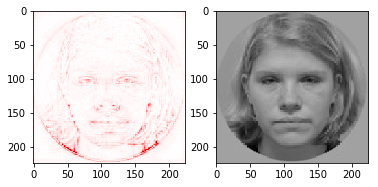

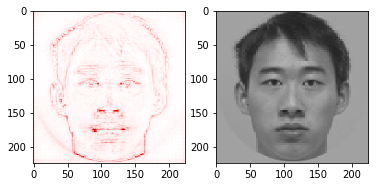

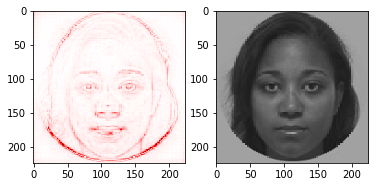

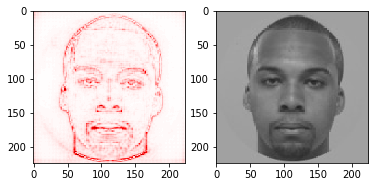

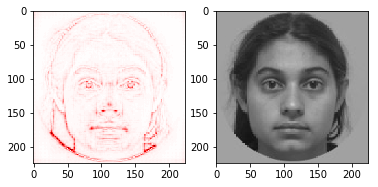

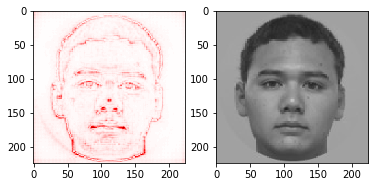

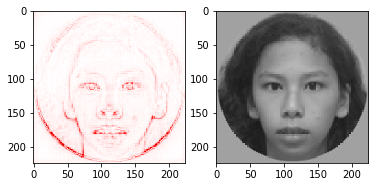

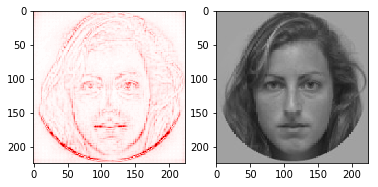

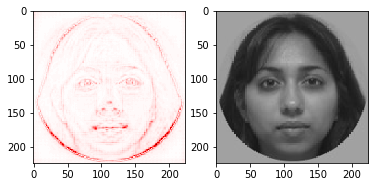

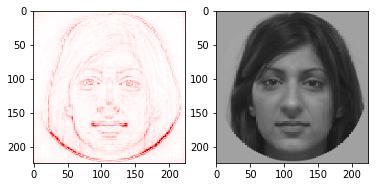

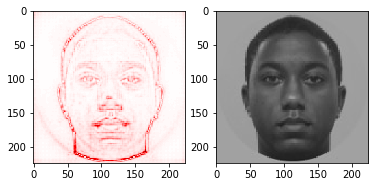

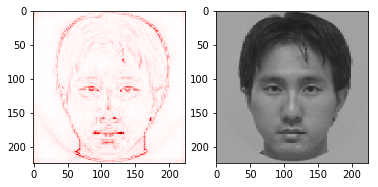

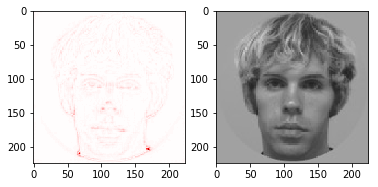

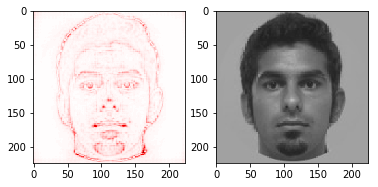

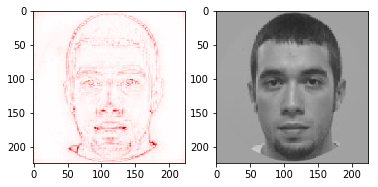

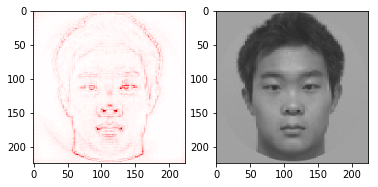

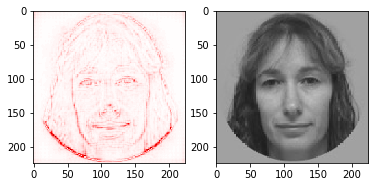

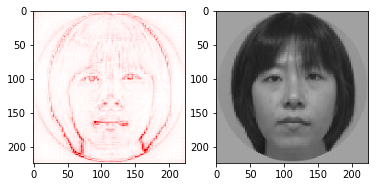

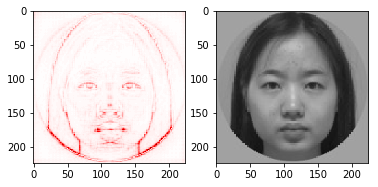

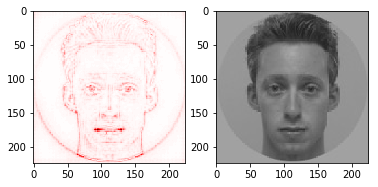

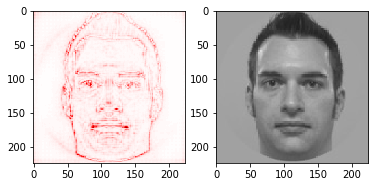

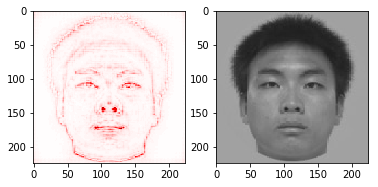

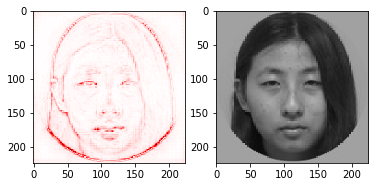

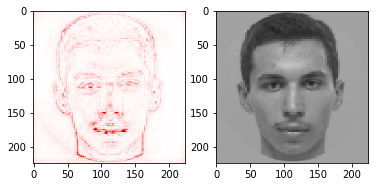

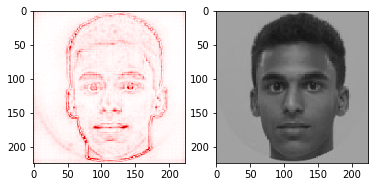

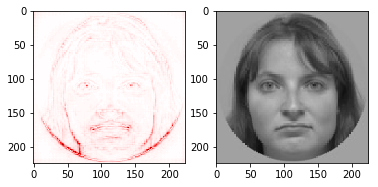

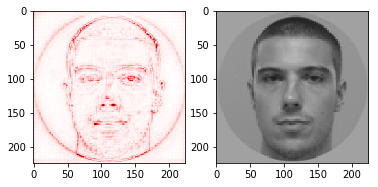

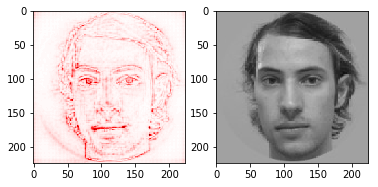

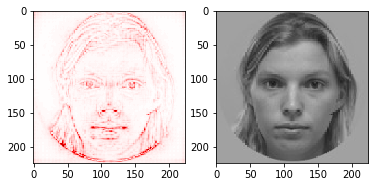

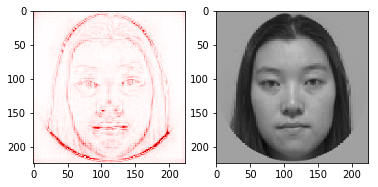

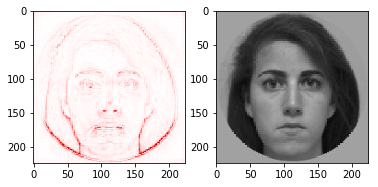

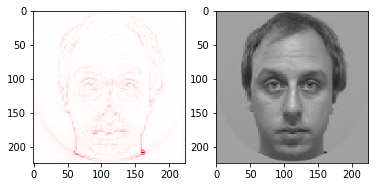

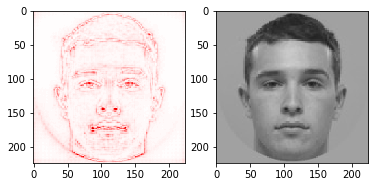

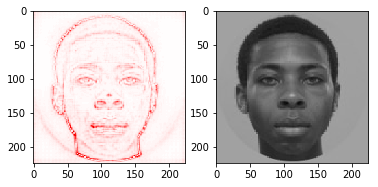

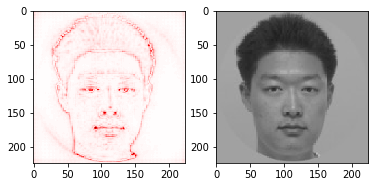

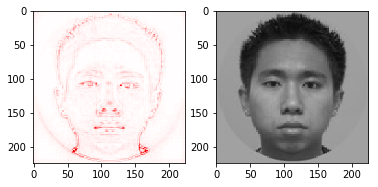

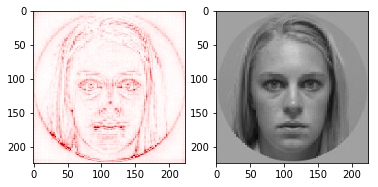

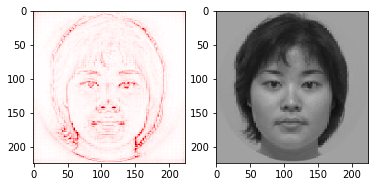

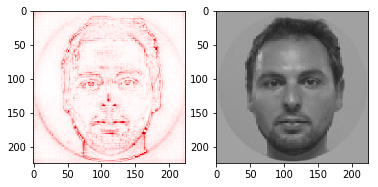

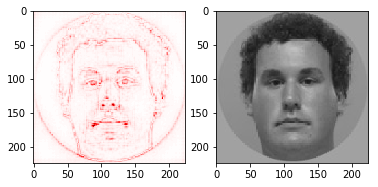

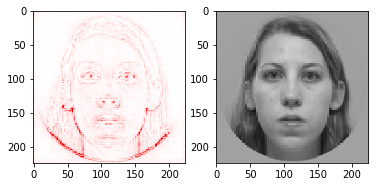

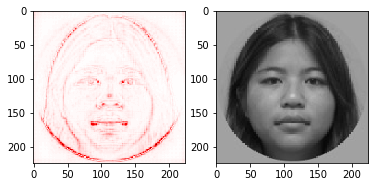

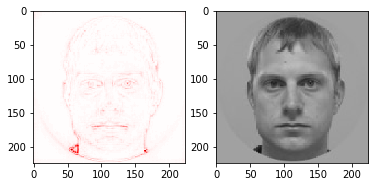

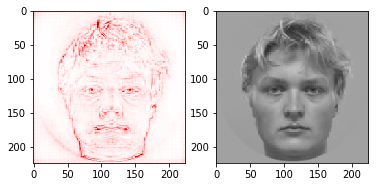

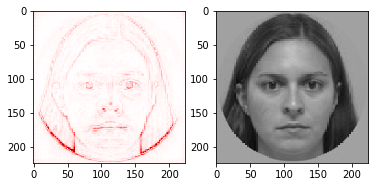

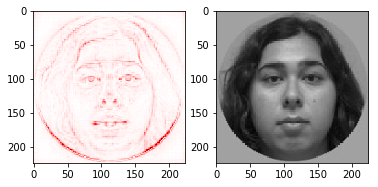

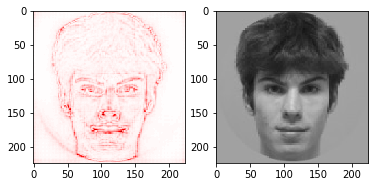

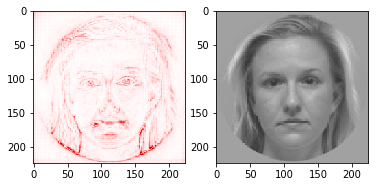

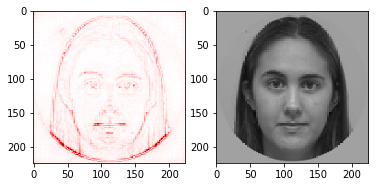

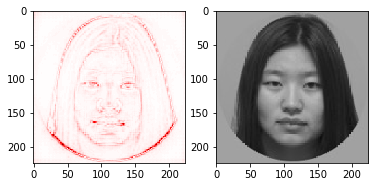

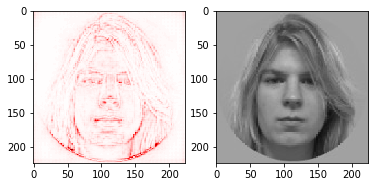

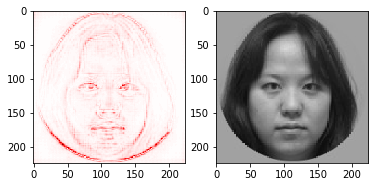

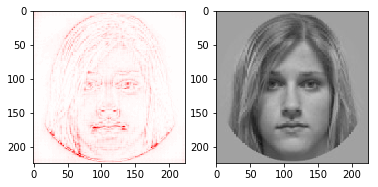

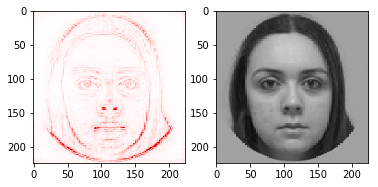

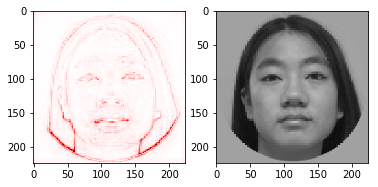

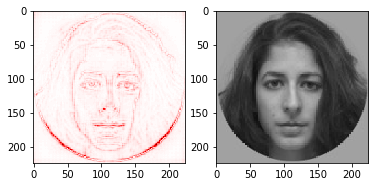

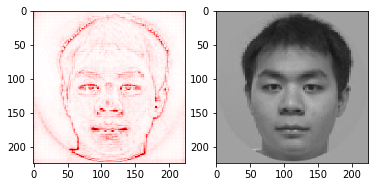

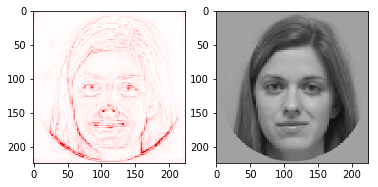

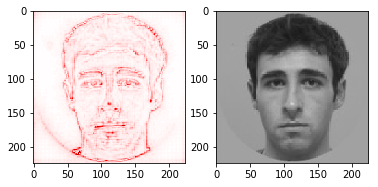

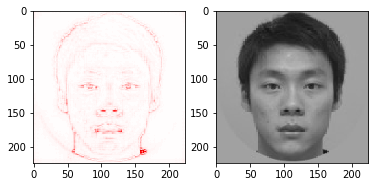

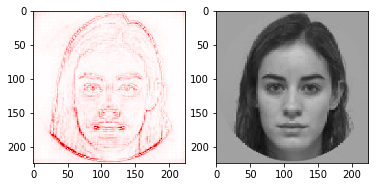

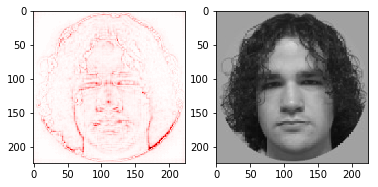

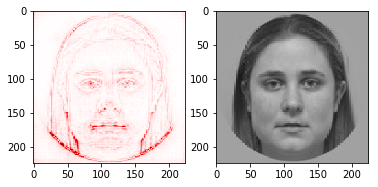

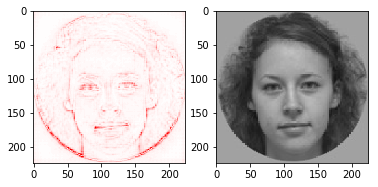

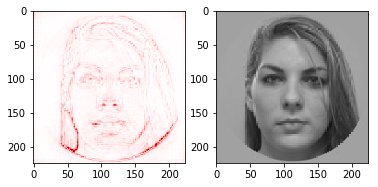

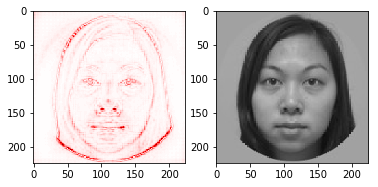

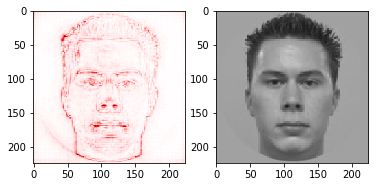

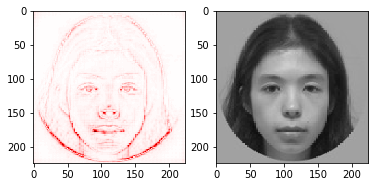

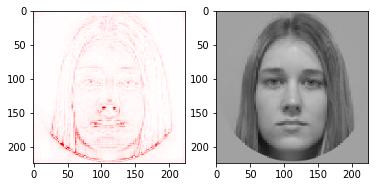

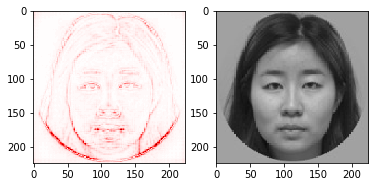

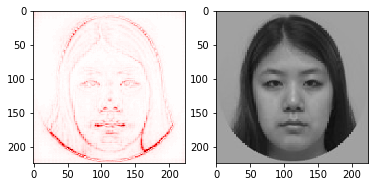

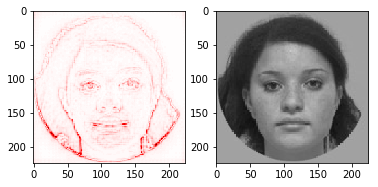

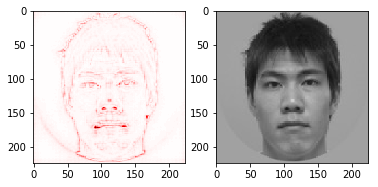

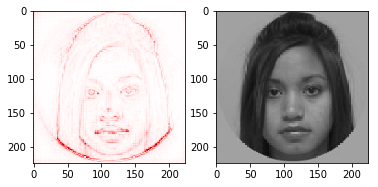

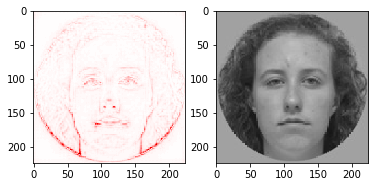

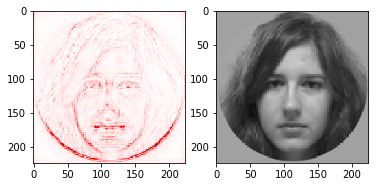

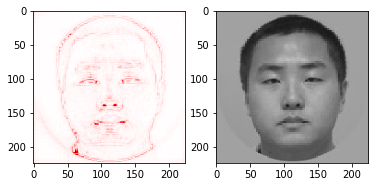

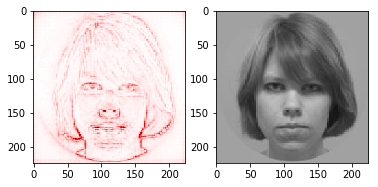

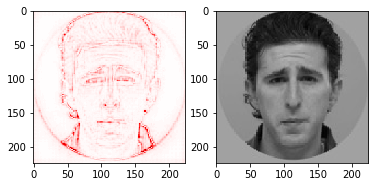

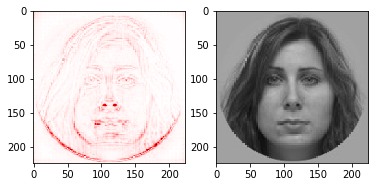

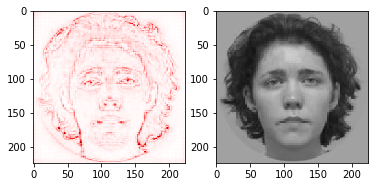

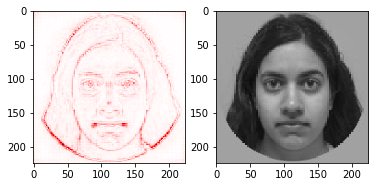

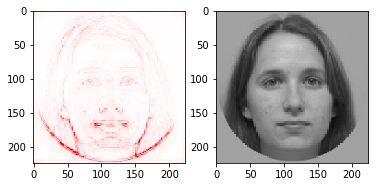

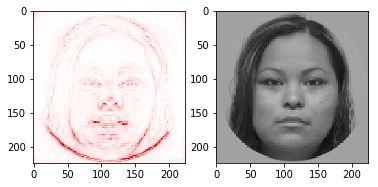

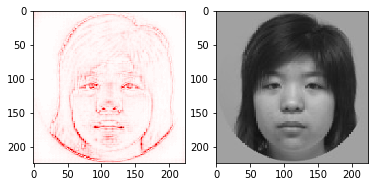

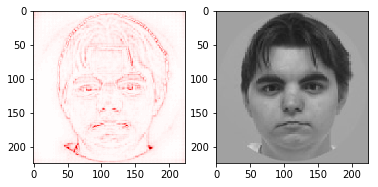

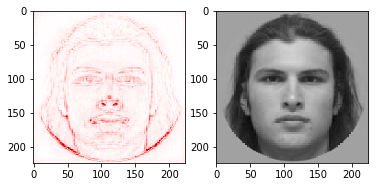

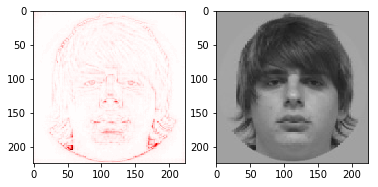

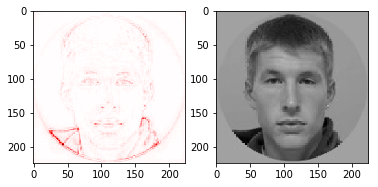

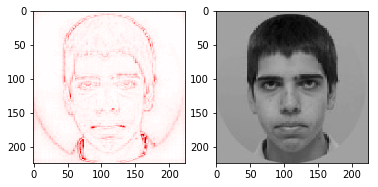

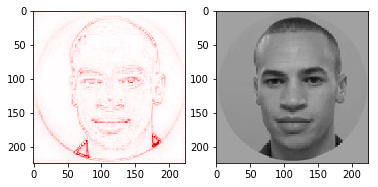

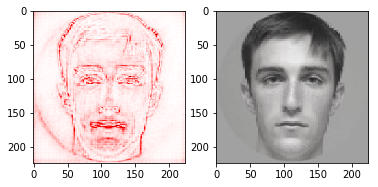

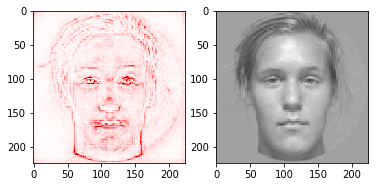

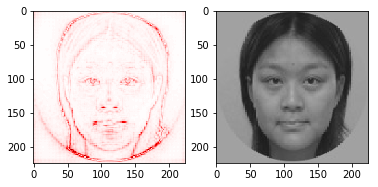

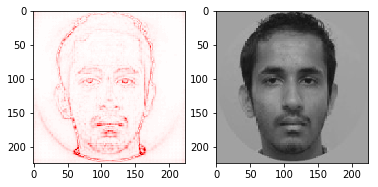

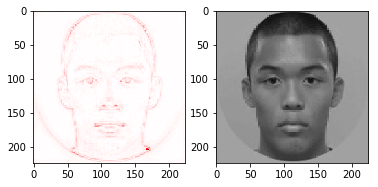

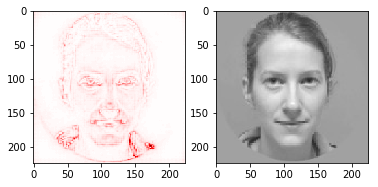

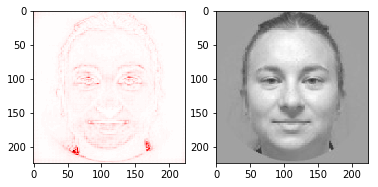

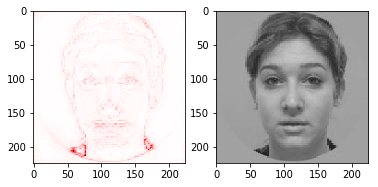

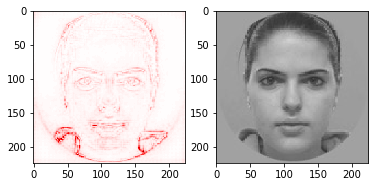

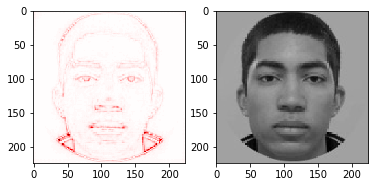

In [79]:
for i in range(len(rs)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(rs[i], cmap="seismic", clim=[-1,1])
    #plt.colorbar()
    plt.subplot(1,2,2)
    plt.imshow(ps[i])

## This, but on KGS Faces

In [48]:
front_view_filenames = []
front_view_classes = []
for base, dirs, files in os.walk(file_locations.PATH_TO_IMDB_GENDER+'../../FaceDataCp/'): 
    for filename in files:
        if "000." in filename or "_0." in filename:
            front_view_filenames.append(base+"/"+filename)

In [49]:
len(front_view_filenames)

101

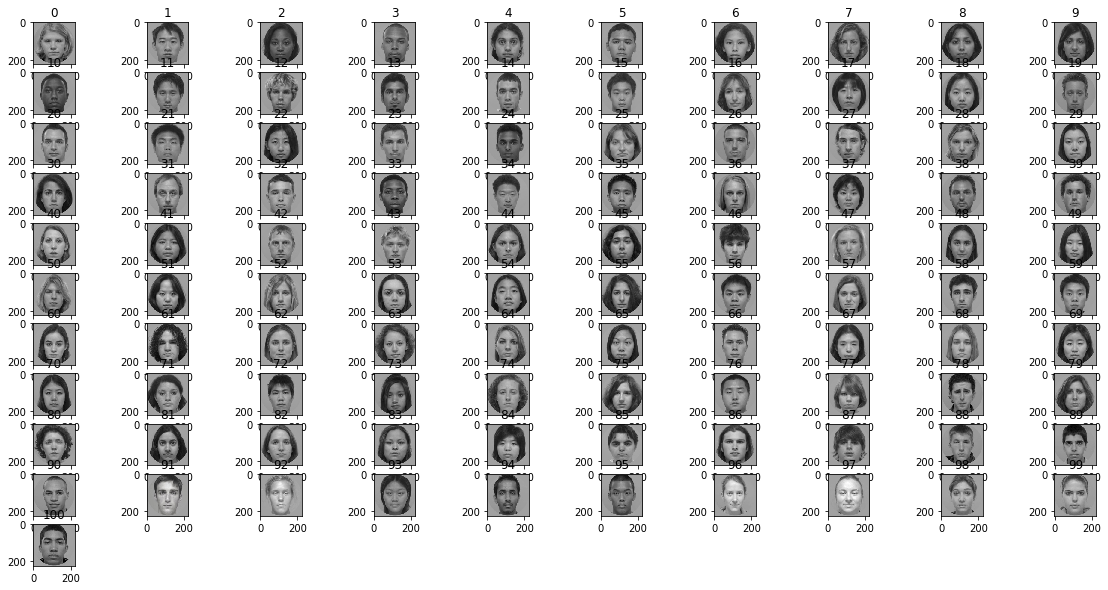

In [50]:
batch = np.zeros((101,224,224,3))
plt.figure(figsize=(20,10))
for i in range(len(front_view_filenames)):
    filename = front_view_filenames[i]
    image = image_utils.load_img(filename,target_size=(224, 224))
    x = image_utils.img_to_array(image)
    batch[i] = x
    plt.subplot(11,10,i+1)
    plt.imshow(batch[i]/255)
    plt.title(i)
    
batch = vgg16.preprocess_input(batch)

In [52]:
(rs_kgs,ps_kgs) = relevanceMap(front_view_filenames)

Analysing image 1 of 101 ...
ETA: Fri Nov 22 13:28:06 2019
Analysing image 2 of 101 ...
ETA: Fri Nov 22 13:28:00 2019
Analysing image 3 of 101 ...
ETA: Fri Nov 22 13:27:59 2019
Analysing image 4 of 101 ...
ETA: Fri Nov 22 13:28:00 2019
Analysing image 5 of 101 ...
ETA: Fri Nov 22 13:27:59 2019
Analysing image 6 of 101 ...
ETA: Fri Nov 22 13:28:02 2019
Analysing image 7 of 101 ...
ETA: Fri Nov 22 13:28:00 2019
Analysing image 8 of 101 ...
ETA: Fri Nov 22 13:28:02 2019
Analysing image 9 of 101 ...
ETA: Fri Nov 22 13:28:00 2019
Analysing image 10 of 101 ...
ETA: Fri Nov 22 13:28:00 2019
Analysing image 11 of 101 ...
ETA: Fri Nov 22 13:28:16 2019
Analysing image 12 of 101 ...
ETA: Fri Nov 22 13:28:16 2019
Analysing image 13 of 101 ...
ETA: Fri Nov 22 13:28:02 2019
Analysing image 14 of 101 ...
ETA: Fri Nov 22 13:28:01 2019
Analysing image 15 of 101 ...
ETA: Fri Nov 22 13:28:00 2019
Analysing image 16 of 101 ...
ETA: Fri Nov 22 13:27:59 2019
Analysing image 17 of 101 ...
ETA: Fri Nov 22 13:

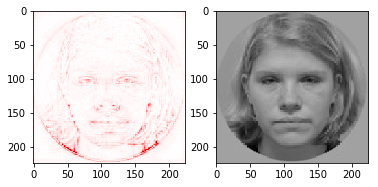

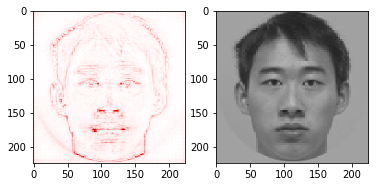

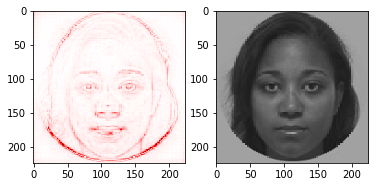

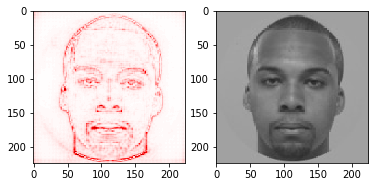

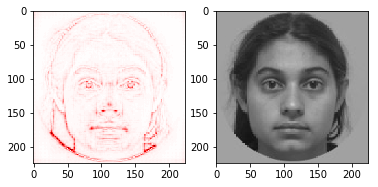

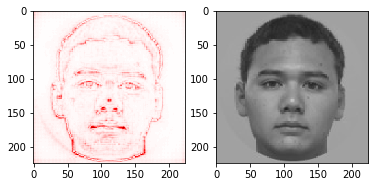

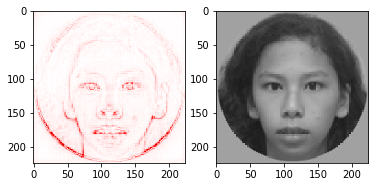

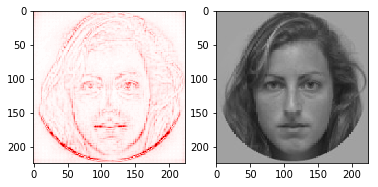

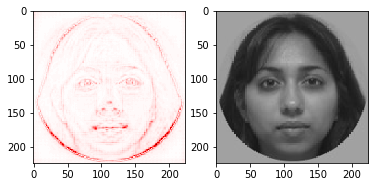

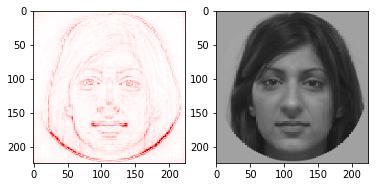

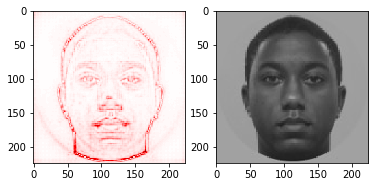

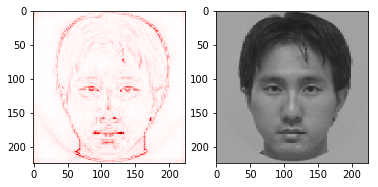

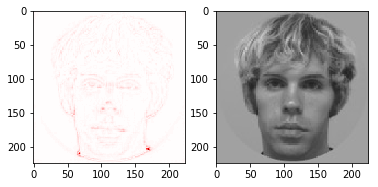

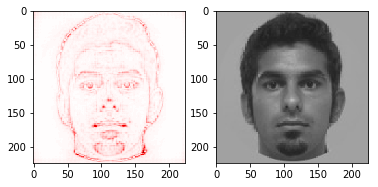

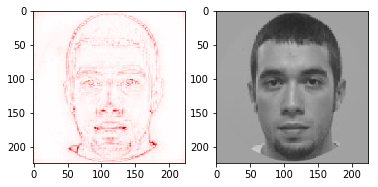

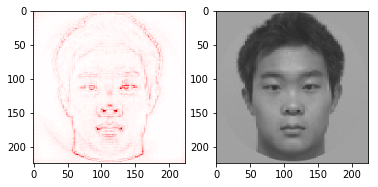

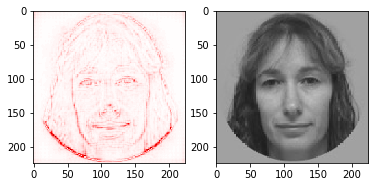

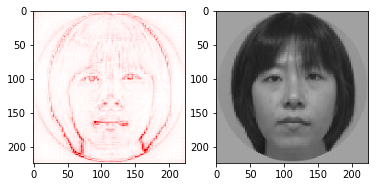

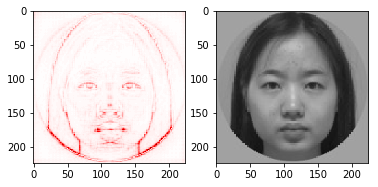

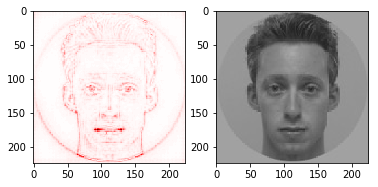

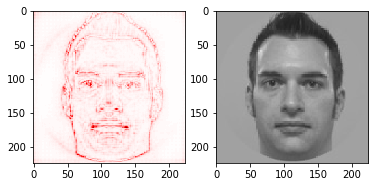

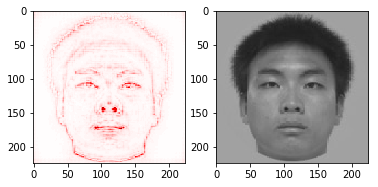

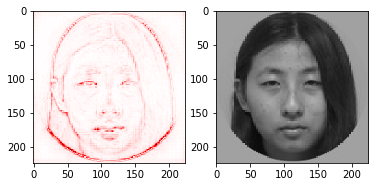

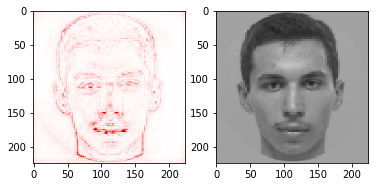

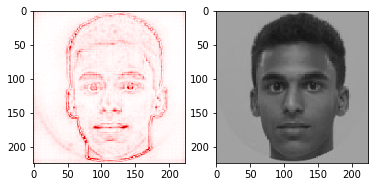

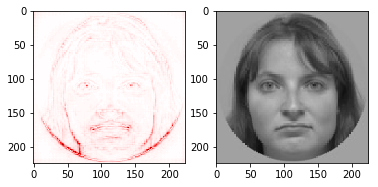

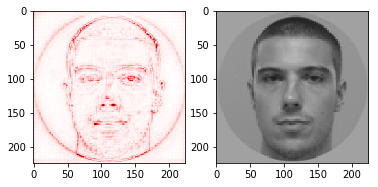

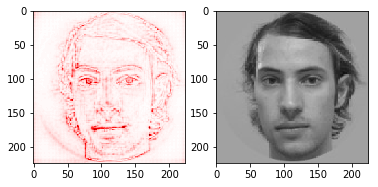

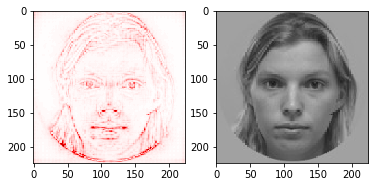

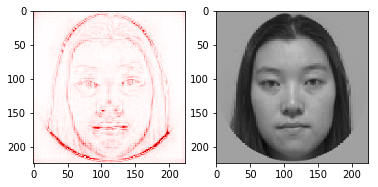

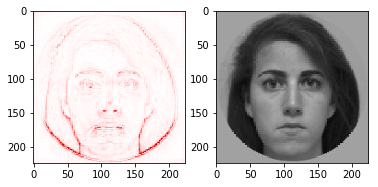

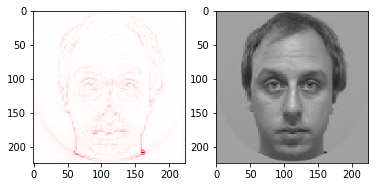

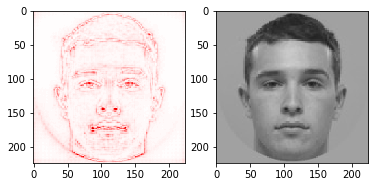

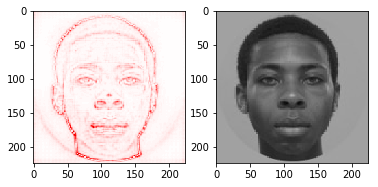

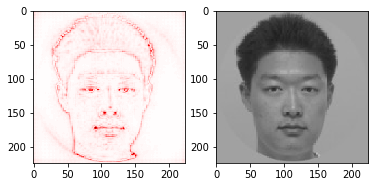

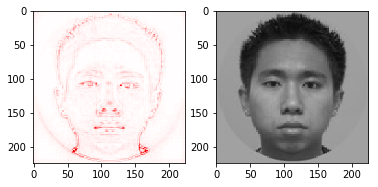

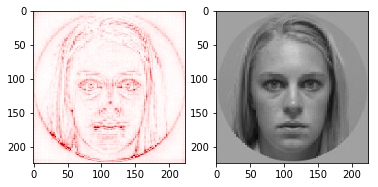

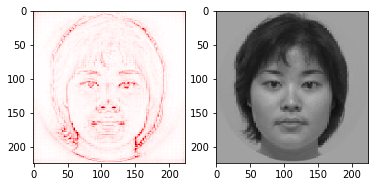

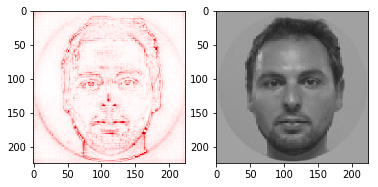

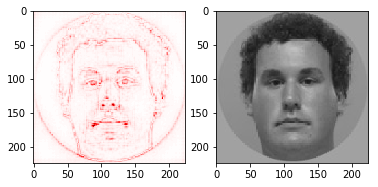

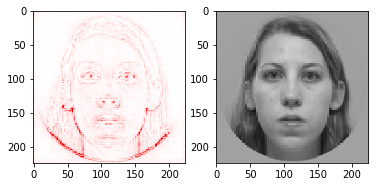

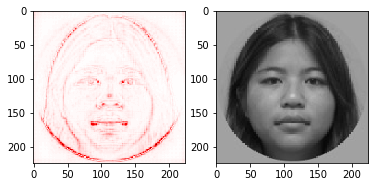

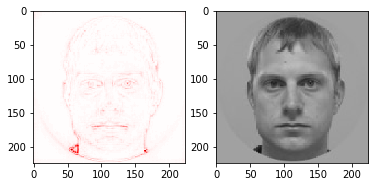

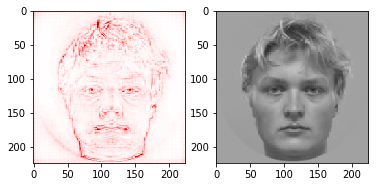

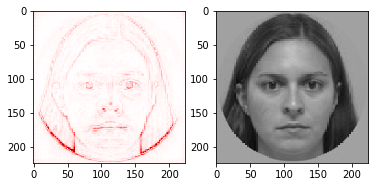

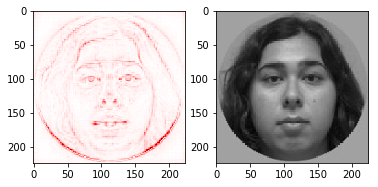

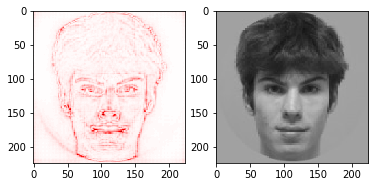

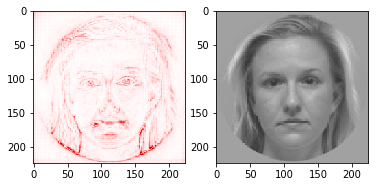

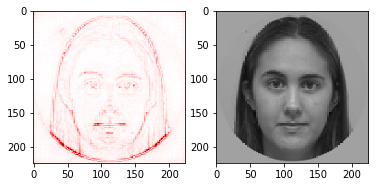

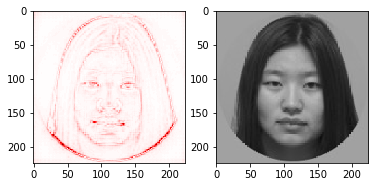

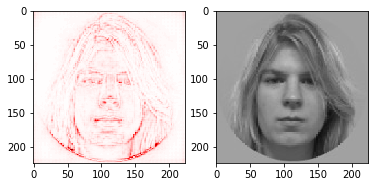

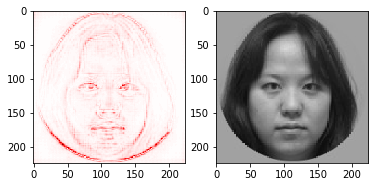

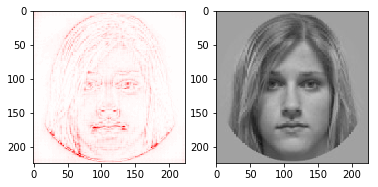

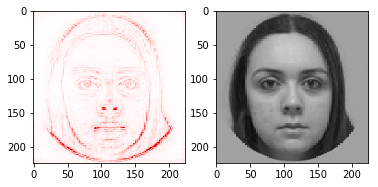

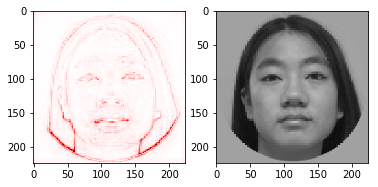

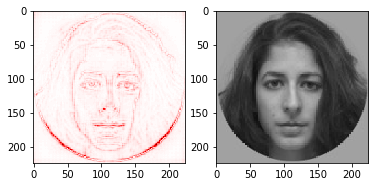

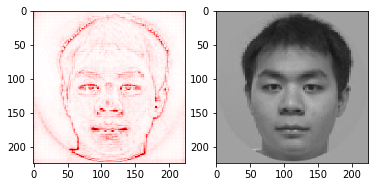

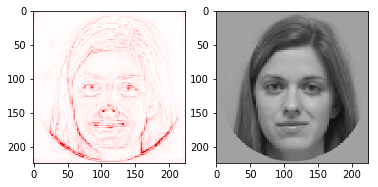

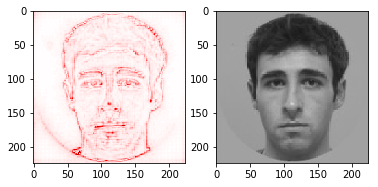

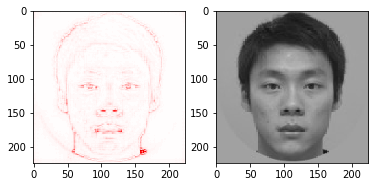

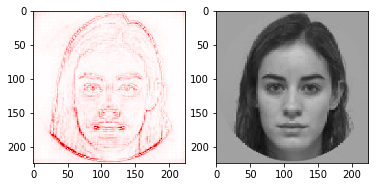

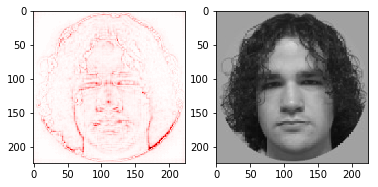

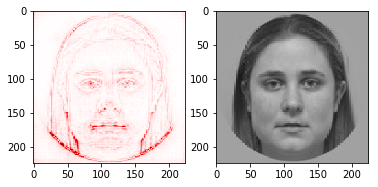

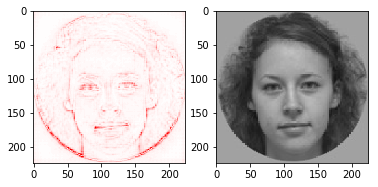

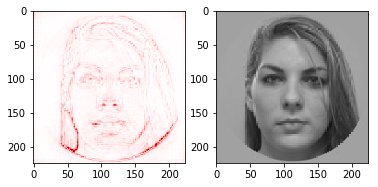

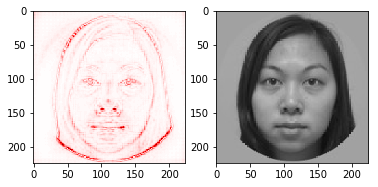

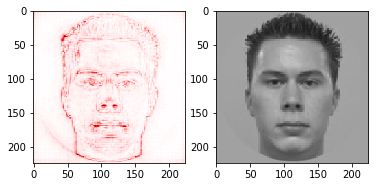

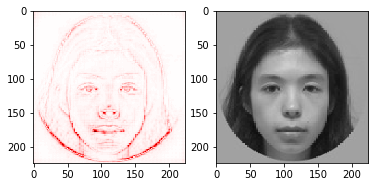

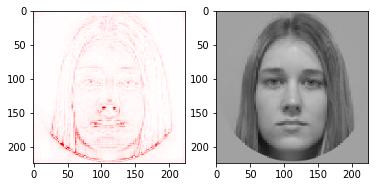

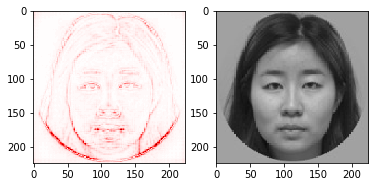

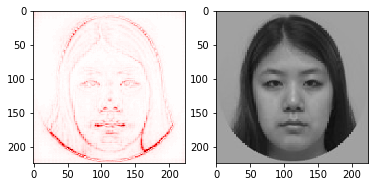

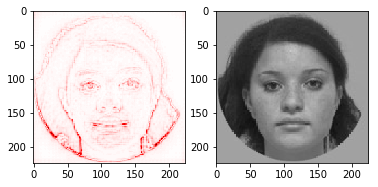

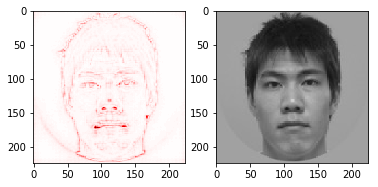

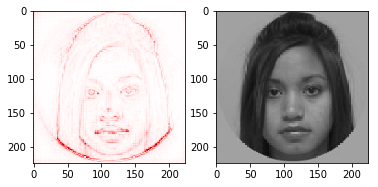

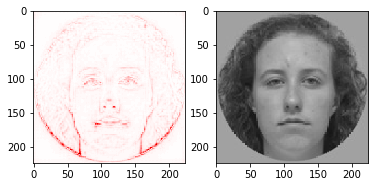

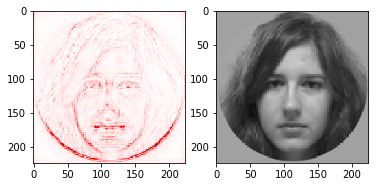

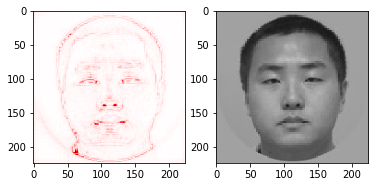

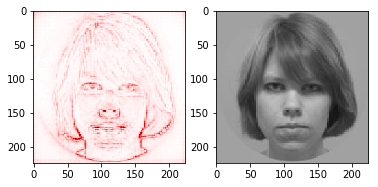

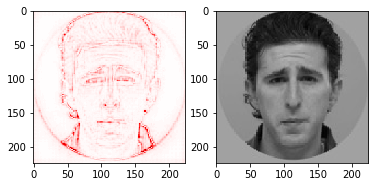

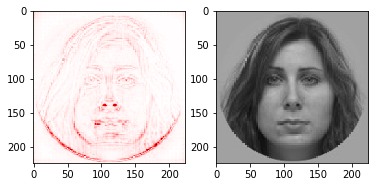

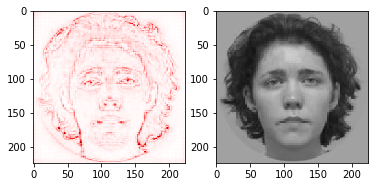

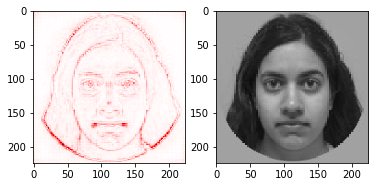

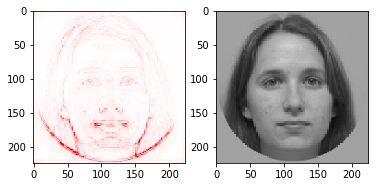

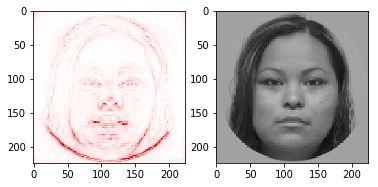

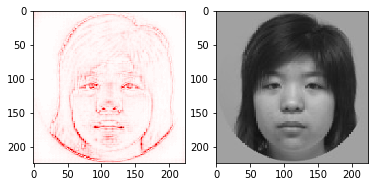

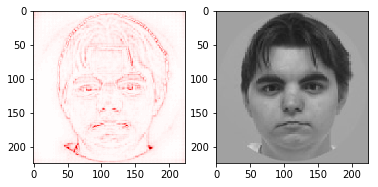

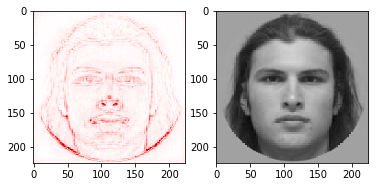

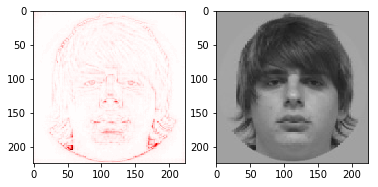

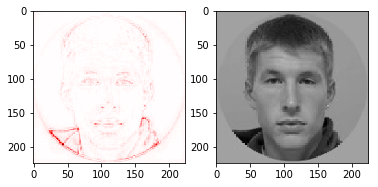

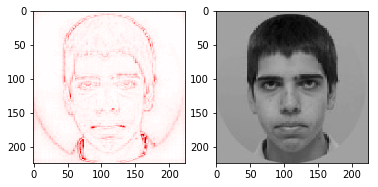

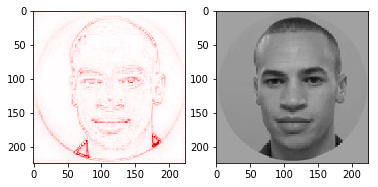

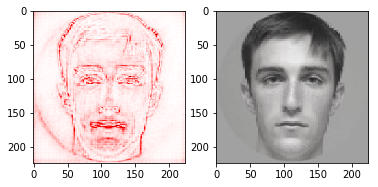

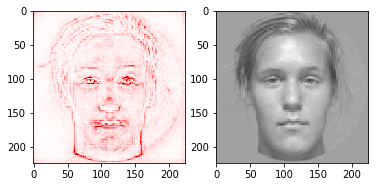

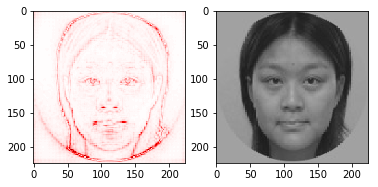

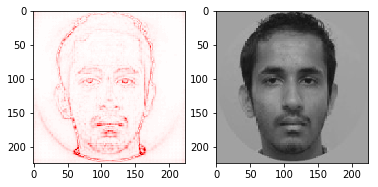

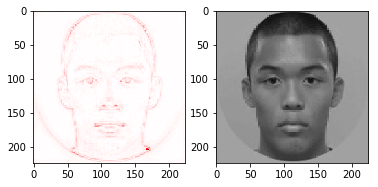

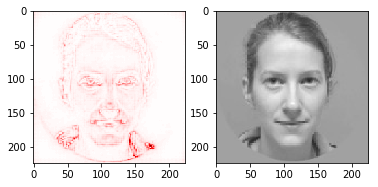

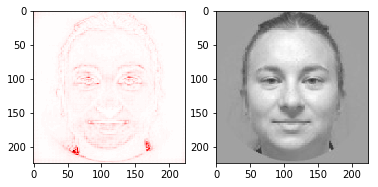

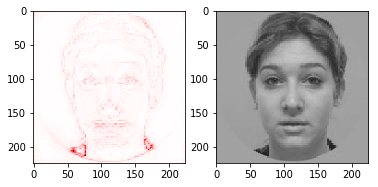

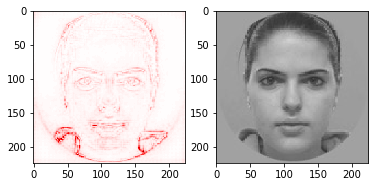

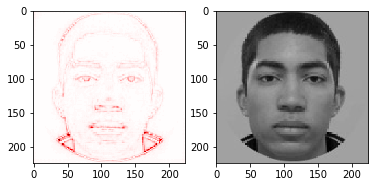

In [85]:
for i in range(len(rs)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(rs[i], cmap="seismic", clim=[-1,1])
    #plt.colorbar()
    plt.subplot(1,2,2)
    plt.imshow(ps[i])

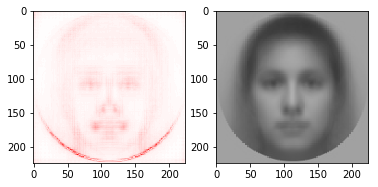

In [87]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(np.average(rs, axis=0), cmap="seismic", clim=[-1,1])

plt.subplot(1,2,2)
plt.imshow(np.average(np.array(list(map(image_utils.img_to_array,ps)))/255, axis=0))

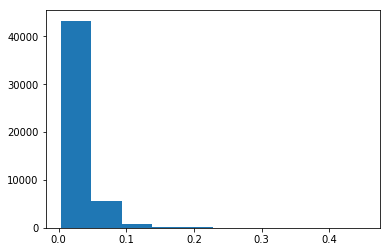

In [68]:
plt.hist(np.average(rs, axis=0).ravel());

## Diffs

In [100]:
m_rs = []
f_rs = []
m_ps = []
f_ps = []
for i in range(len(front_view_filenames)):
    if (( front_view_filenames[i].split('/')[6].split('_')[1]) == 'f') :
        f_rs.append(rs[i])
        f_ps.append(ps[i])
    else:
        m_rs.append(rs[i])
        m_ps.append(ps[i])
    

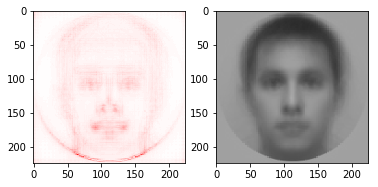

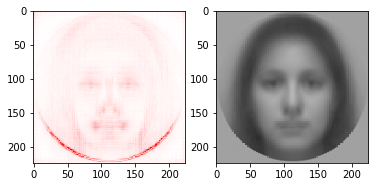

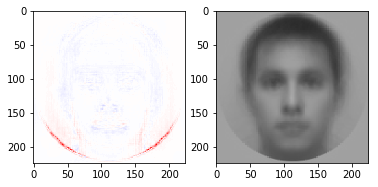

In [105]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(np.average(m_rs, axis=0), cmap="seismic", clim=[-1,1])

plt.subplot(1,2,2)
plt.imshow(np.average(np.array(list(map(image_utils.img_to_array,m_ps)))/255, axis=0))

plt.figure()

plt.subplot(1,2,1)
plt.imshow(np.average(f_rs, axis=0), cmap="seismic", clim=[-1,1])

plt.subplot(1,2,2)
plt.imshow(np.average(np.array(list(map(image_utils.img_to_array,f_ps)))/255, axis=0))

plt.figure()

plt.subplot(1,2,1)
plt.imshow(np.average(f_rs, axis=0)-np.average(m_rs, axis=0), cmap="seismic", clim=[-1,1])

plt.subplot(1,2,2)
plt.imshow(np.average(np.array(list(map(image_utils.img_to_array,m_ps)))/255, axis=0))

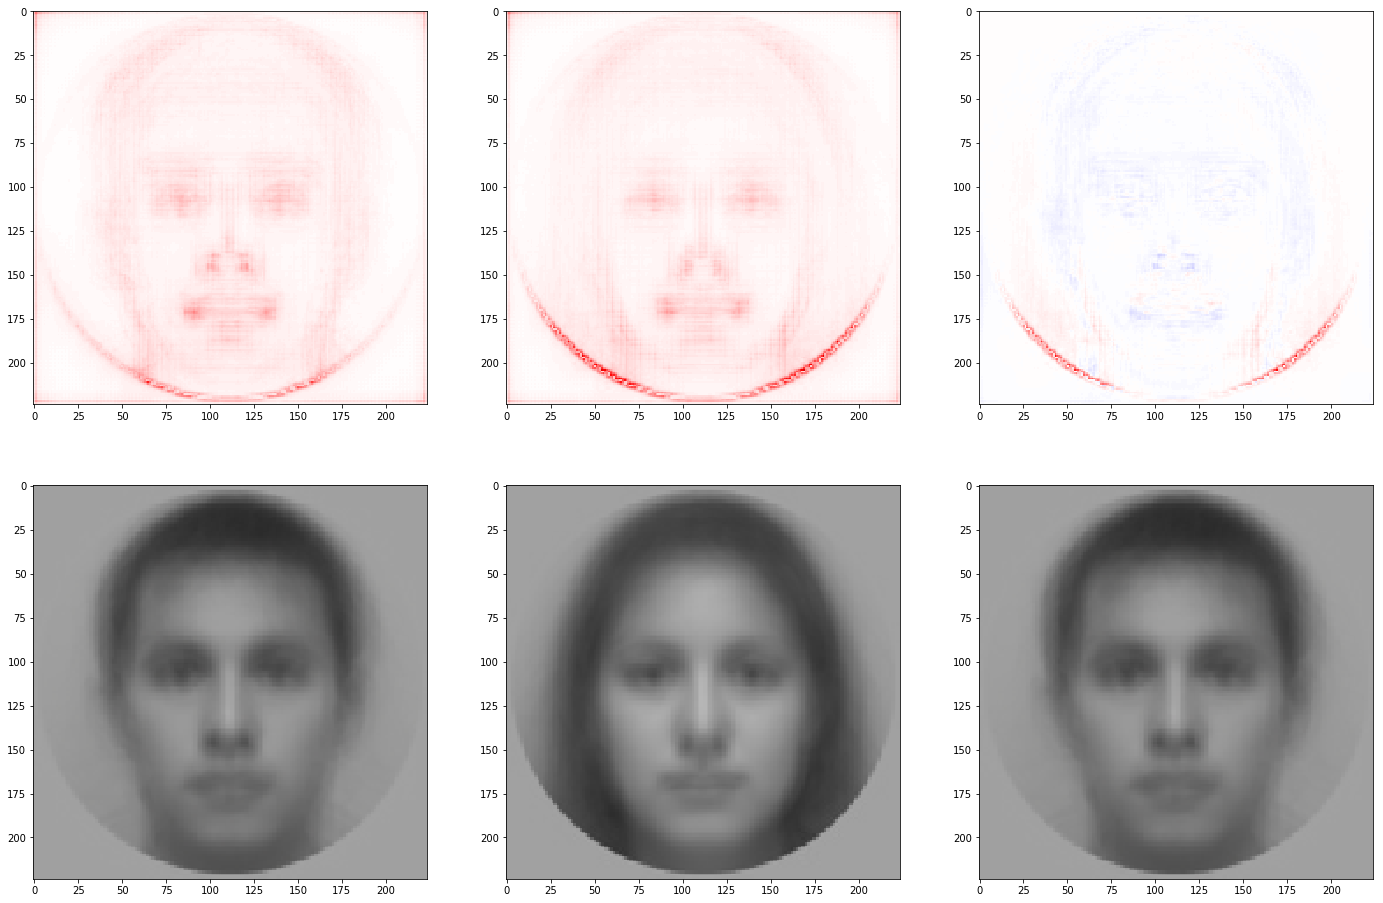

In [107]:
fig, axes = plt.subplots(figsize=(24, 16), nrows=2, ncols=3)

# average male
axes[0, 0].imshow(np.average(m_rs, axis=0), cmap="seismic", clim=[-1,1])
axes[1, 0].imshow(np.average(np.array(list(map(image_utils.img_to_array,m_ps)))/255, axis=0))

# average female
axes[0, 1].imshow(np.average(f_rs, axis=0), cmap="seismic", clim=[-1,1])
axes[1, 1].imshow(np.average(np.array(list(map(image_utils.img_to_array,f_ps)))/255, axis=0))

# difference
axes[0, 2].imshow(np.average(f_rs, axis=0)-np.average(m_rs, axis=0), cmap="seismic", clim=[-1,1])
axes[1, 2].imshow(np.average(np.array(list(map(image_utils.img_to_array,m_ps)))/255, axis=0))